This Notebook creates Radar Graphics where the countries are axes and the different models are plotted within each country.

Also the result values are normalized using zero-max normalization, so each graphics shows values from 0 to 1.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Tollerance of Ambiguity Test
general_tollerance_of_ambiguity_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Novelty - gpt-3.5-turbo": [3.125, 2.958333333, 2.916666667, 2.875, 3.166666667, 2.958333333, 3.25],
    "Complexity - gpt-3.5-turbo": [5.166666667, 5.3125, 5.125, 5.104166667, 5.4375, 5.5625, 5.354166667],
    "Insolubility - gpt-3.5-turbo": [5.888888889, 5.111111111, 5.777777778, 5.055555556, 5.555555556, 5.333333333, 5.444444444],
    "Novelty - gpt-4-turbo": [4.666666667, 5, 4.666666667, 4.583333333, 4.625, 4.541666667, 4.541666667],
    "Complexity - gpt-4-turbo": [6.125, 6.125, 6.166666667, 6.1875, 6.145833333, 6.104166667, 6.25],
    "Insolubility - gpt-4-turbo": [5.055555556, 5.388888889, 5.111111111, 5.055555556, 5.222222222, 5.222222222, 5.166666667],
    "Novelty - gpt-4o": [5.916666667, 5.125, 5.25, 5.583333333, 5.458333333, 6.125, 5.25],
    "Complexity - gpt-4o": [5.625, 5.666666667, 5.333333333, 5.791666667, 5.6875, 5.666666667, 5.645833333],
    "Insolubility - gpt-4o": [4.944444444, 5, 5.055555556, 4.944444444, 5.055555556, 4.833333333, 5],
    "Novelty - Human": [3.25, 3.25, 3.167, 3.348, 3.469, 3.667, 3.143],
    "Complexity - Human": [3.656, 3.542, 3.388, 3.781, 3.708, 3.313, 3.196],
    "Insolubility - Human": [3.167, 3, 3.026, 3.44, 3.292, 3.222, 3.429]
}

df = pd.DataFrame(general_tollerance_of_ambiguity_data)

In [ ]:
def zero_max_normalize(df):
    df_normalized = df.copy()  # Create a copy to avoid modifying the original DataFrame

    columns_to_normalize = df.columns[1:]  # Exclude the 'Country' column

    for column in columns_to_normalize:
        max_val = df[column].max()

        # Normalize the values based on max value
        df_normalized[column] = df[column] / max_val

    return df_normalized

In [ ]:
def plot_radar_chart_for_dimension(df, concept, dimension):
    categories = df['Country'].values.tolist()  # Countries as categories

    # Models to compare
    models = ['gpt-3.5-turbo', 'gpt-4-turbo', 'gpt-4o', 'Human']

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Compute angles for radar chart
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # close the radar chart loop

    for model in models:
        values = df[f'{dimension} - {model}'].values.tolist()
        values += values[:1]

        ax.plot(angles, values, linewidth=2, label=model)
        # ax.fill(angles, values, alpha=0.25)

    # Set category (country) labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Please comment the following three lines for different graphics look
    ax.xaxis.grid(True, linestyle='-', color='black', linewidth=1.5)
    # ax.yaxis.grid(False)  # Disable radial gridlines
    ax.spines['polar'].set_visible(False)

    if concept == dimension:
        title = f"{concept}"
    else:
        title = f"{concept} - Dimension: {dimension}"

    # Set chart title
    ax.set_title(title, size=15, color='black', y=1.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

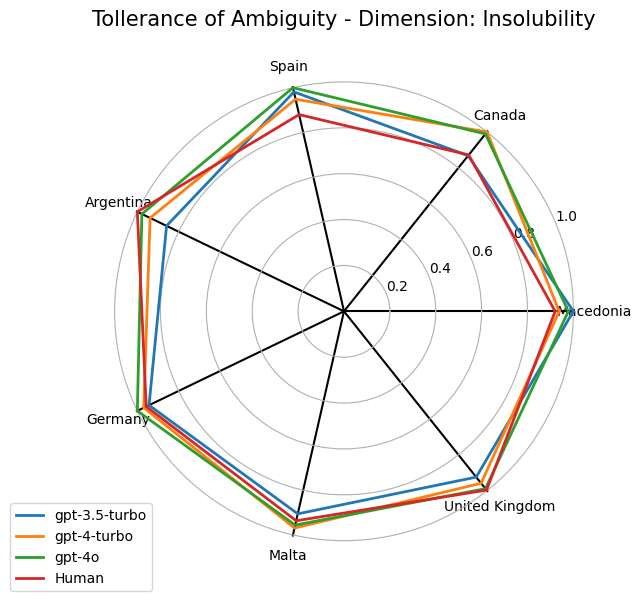

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Tollerance of Ambiguity','Insolubility')

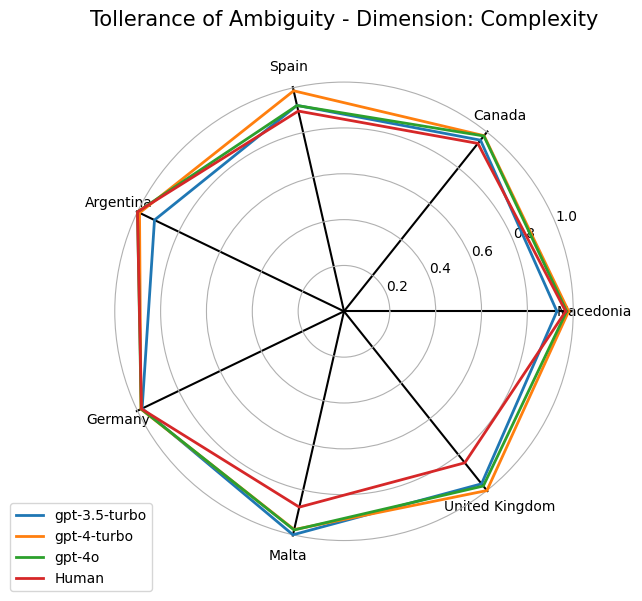

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Tollerance of Ambiguity', 'Complexity')

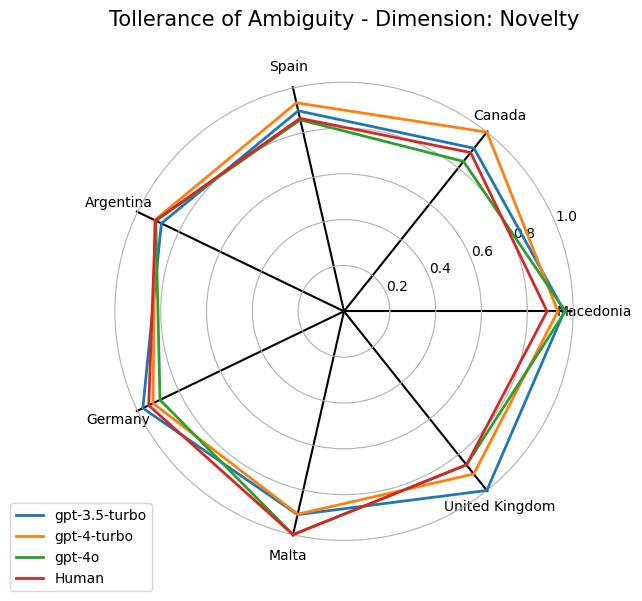

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized,'Tollerance of Ambiguity','Novelty')

In [ ]:
# Cognitive Style Test
general_cognitive_style_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Knowing - gpt-3.5-turbo": [4.13, 3.958333333, 4.041666667, 4.083333333, 4.166666667, 4.208333333, 4.041666667],
    "Planning - gpt-3.5-turbo": [4.333333333, 4.285714286, 4.095238095, 4.142857143, 4.452380952, 4.285714286, 4.166666667],
    "Creating - gpt-3.5-turbo": [3.595238096, 3.428571429, 3.404761905, 3.380952381, 3.476190476, 3.833333333, 3.357142857],
    "Knowing - gpt-4-turbo": [4.75, 4.75, 4.75, 4.666666667, 4.916666667, 4.833333333, 4.75],
    "Planning - gpt-4-turbo": [4.952380952, 4.80952381, 4.809523809, 4.928571429, 5, 4.928571429, 4.857142857],
    "Creating - gpt-4-turbo": [4.095148095, 4.190476191, 4.047619048, 4.333333333, 4.071428572, 4.357142857, 4.071428572],
    "Knowing - gpt-4o": [5, 5, 5, 5, 5, 5, 5],
    "Planning - gpt-4o": [5, 5, 5, 5, 5, 4.952380952, 4.976190476],
    "Creating - gpt-4o": [4.095238095, 4.261904762, 4.261904762, 4.261904762, 4.095238095, 4.095238095, 4.214285714],
    "Knowing - Human": [4.473, 4.25, 4.208, 4.188, 3.885, 4.365, 3.571],
    "Planning - Human": [4.413, 4.429, 3.905, 3.964, 3.648, 3.982, 4.184],
    "Creating - Human": [4.097, 3.667, 4.095, 3.786, 3.476, 3.857, 3.918]
}

df = pd.DataFrame(general_cognitive_style_data)

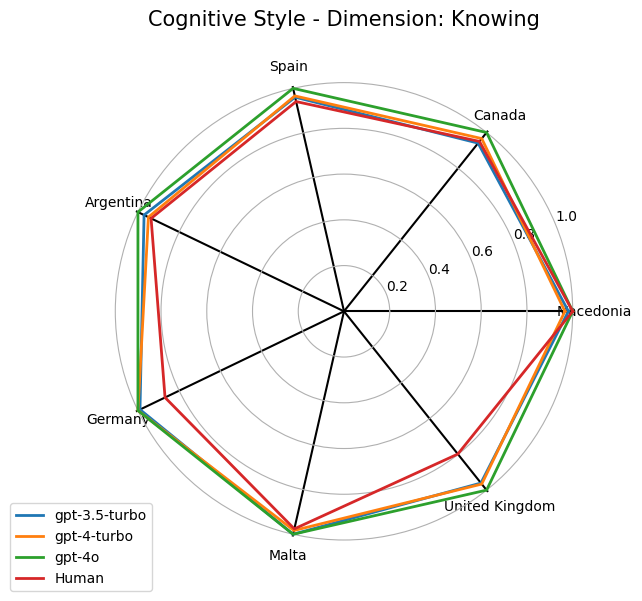

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Cognitive Style', 'Knowing')

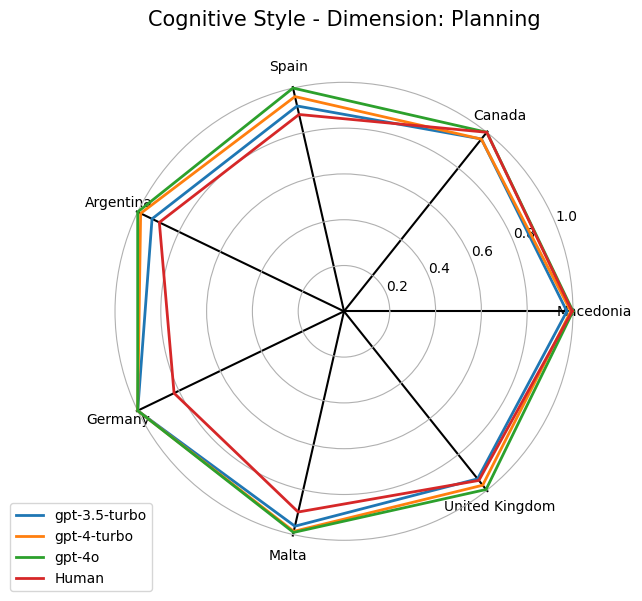

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Cognitive Style', 'Planning')

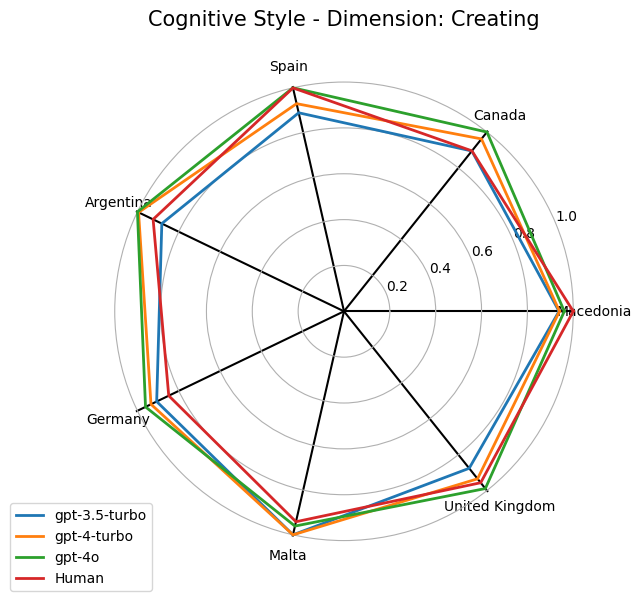

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Cognitive Style', 'Creating')

In [ ]:
# Innovative Attitude Test

general_innovative_attitude_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Innovative Attitude - gpt-3.5-turbo": [80.66666667, 82.83333333, 80.83333333, 81, 81, 81.33333333, 81.5],
    "Innovative Attitude - gpt-4-turbo": [93.66666667, 94.5, 93.66666667, 93, 91.16666667, 96.66666667, 88.33333333],
    "Innovative Attitude - gpt-4o": [87.66666667, 88.16666667, 89, 87.5, 88.5, 87.5, 87.83333333],
    "Innovative Attitude - Human": [68.75, 83.00, 70.72, 81.21, 76.46, 81.00, 67.71]
}

df = pd.DataFrame(general_innovative_attitude_data)

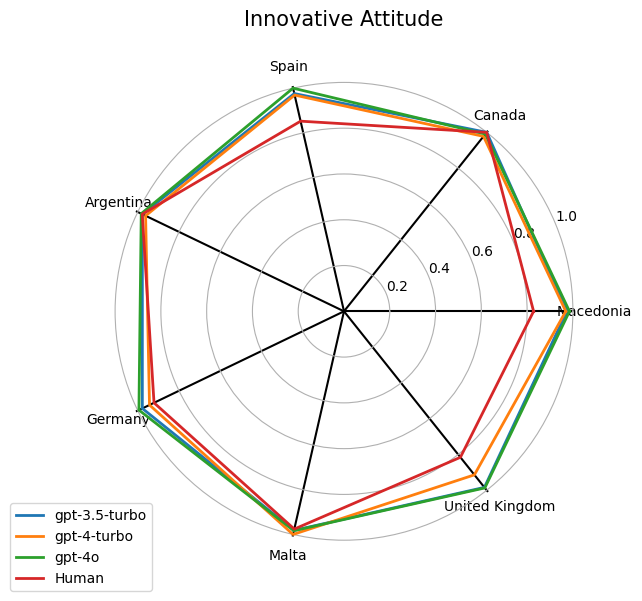

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized,'Innovative Attitude', 'Innovative Attitude')

In [ ]:
# Emotional Intelligence Test

general_emotional_intelligence_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Emotional Response - gpt-3.5-turbo": [26.66666667, 28.33333333, 28.33333333, 26.66666667, 28.33333333, 28.33333333, 26.66666667],
    "Emotional Response - gpt-4-turbo": [20, 16.66666667, 20, 20, 20, 20, 16.66666667],
    "Emotional Response - gpt-4o": [28.33333333, 30, 30, 30, 28.33333333, 28.33333333, 30],
    "Emotional Response - Human": [19.75, 21.00, 16.44, 19.68, 20.63, 19.50, 13.00]
}

df = pd.DataFrame(general_emotional_intelligence_data)

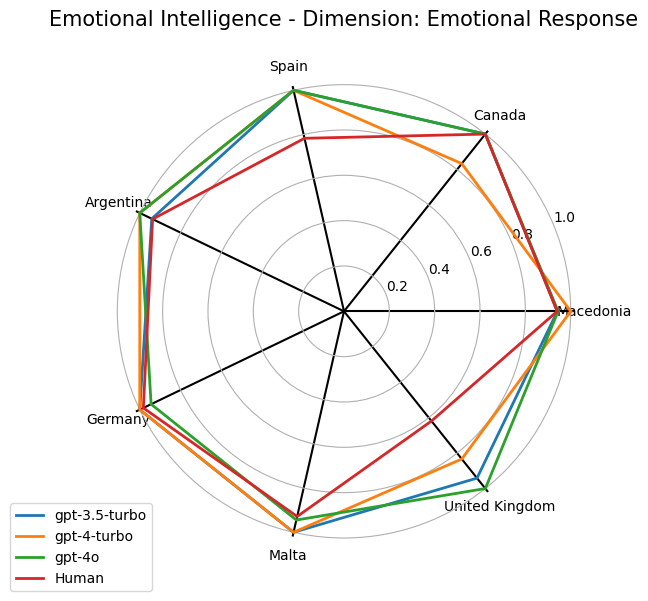

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Emotional Intelligence','Emotional Response')

In [ ]:
# Emotional Intelligence Test second execution

general_emotional_intelligence_data_v2 = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Emotional Response - gpt-3.5-turbo": [28.3333333,  28.3333333, 28.3333333, 26.6666667, 26.6666667, 28.3333333,  26.6666667 ],
    "Emotional Response - gpt-4-turbo": [20, 20, 20, 20, 20, 20, 20],
    "Emotional Response - gpt-4o": [28.33333333, 30, 30, 30, 30, 30, 30],
    "Emotional Response - Human": [19.75, 21.00, 16.44, 19.68, 20.63, 19.50, 13.00]
}

df = pd.DataFrame(general_emotional_intelligence_data_v2)

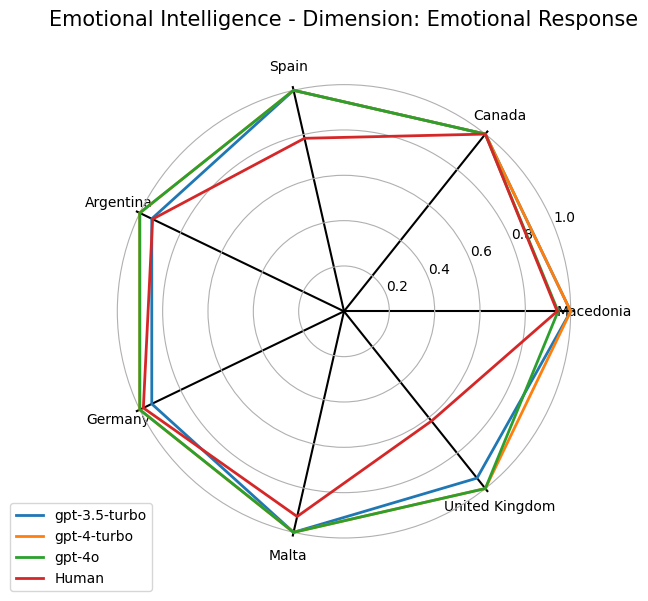

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized, 'Emotional Intelligence','Emotional Response')

In [ ]:
# Locus of Control Test

general_locus_of_control_data = {
    "Country": ["Macedonia", "Canada", "Spain", "Argentina", "Germany", "Malta", "United Kingdom"],
    "Locus of Control - gpt-3.5-turbo": [5.5, 4.833333333, 4.833333333, 4.833333333, 4.833333333, 5.166666667, 5],
    "Locus of Control - gpt-4-turbo": [1.166666667, 0.5, 1, 0.833333333, 0.833333333, 0.666666667, 0.833333333],
    "Locus of Control - gpt-4o": [1, 1, 1, 1, 1, 0.833333333, 0.833333333],
    "Locus of Control - Human": [7.25, 3.333, 7.795, 6.036, 7.292, 6.167, 9.429]
}

df = pd.DataFrame(general_locus_of_control_data)

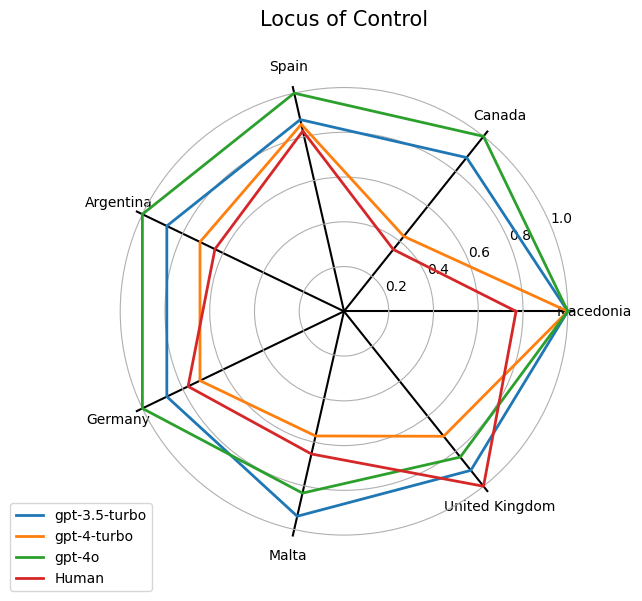

In [ ]:
df_normalized = zero_max_normalize(df)
plot_radar_chart_for_dimension(df_normalized,'Locus of Control', 'Locus of Control')